In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
google_stock = pd.read_csv('data/GOOG.csv', index_col='Date', parse_dates=True)

# Ensure the dataset is sorted by date
google_stock.sort_index(inplace=True)


<Figure size 1400x700 with 0 Axes>

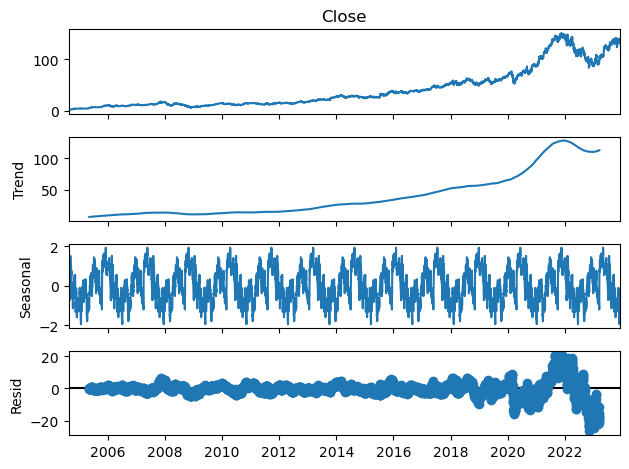

In [13]:
# Decompose the time series using an additive model
decomposition = seasonal_decompose(google_stock['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(14, 7))
decomposition.plot()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


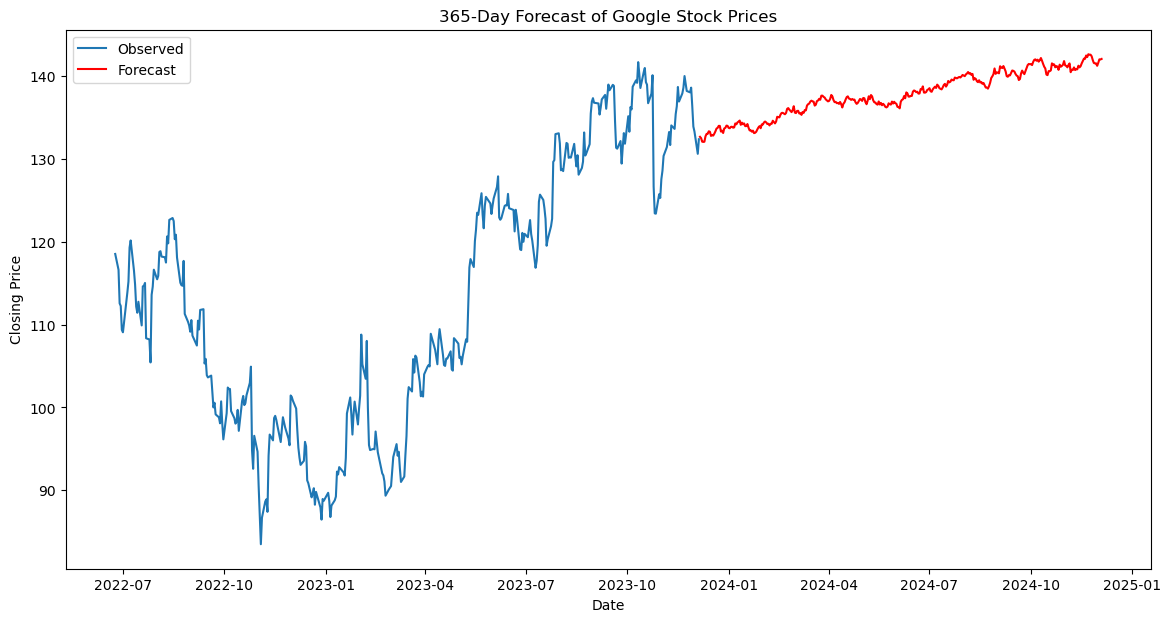

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
google_stock = pd.read_csv('data/GOOG.csv', index_col='Date', parse_dates=True)

# Ensure the dataset is sorted by date
google_stock.sort_index(inplace=True)

# Using an additive model due to linear trend behavior
model = ExponentialSmoothing(google_stock['Close'], trend="add", seasonal="add", seasonal_periods=365)
fit = model.fit()

# Forecast the next 365 days
forecast = fit.forecast(steps=365)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(google_stock['Close'].iloc[-365:], label='Observed')
plt.plot(pd.date_range(google_stock.index[-1], periods=366, freq='D')[1:], forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('365-Day Forecast of Google Stock Prices')
plt.legend()
plt.show()


ADF Statistic: 0.8367313674962437
p-value: 0.9922065303390483


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


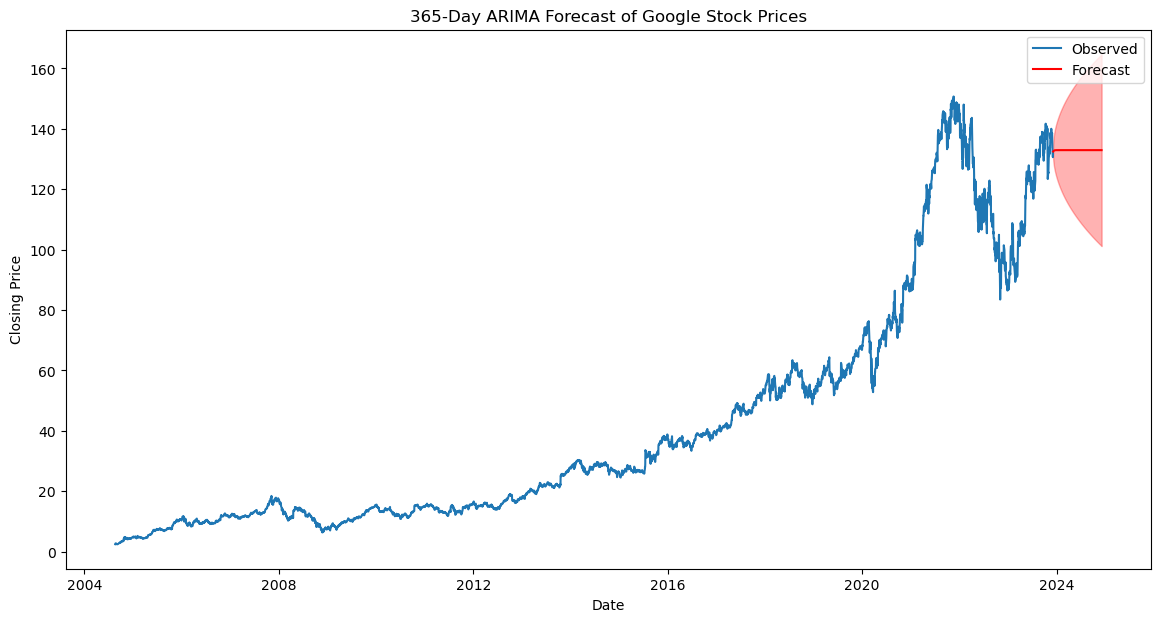

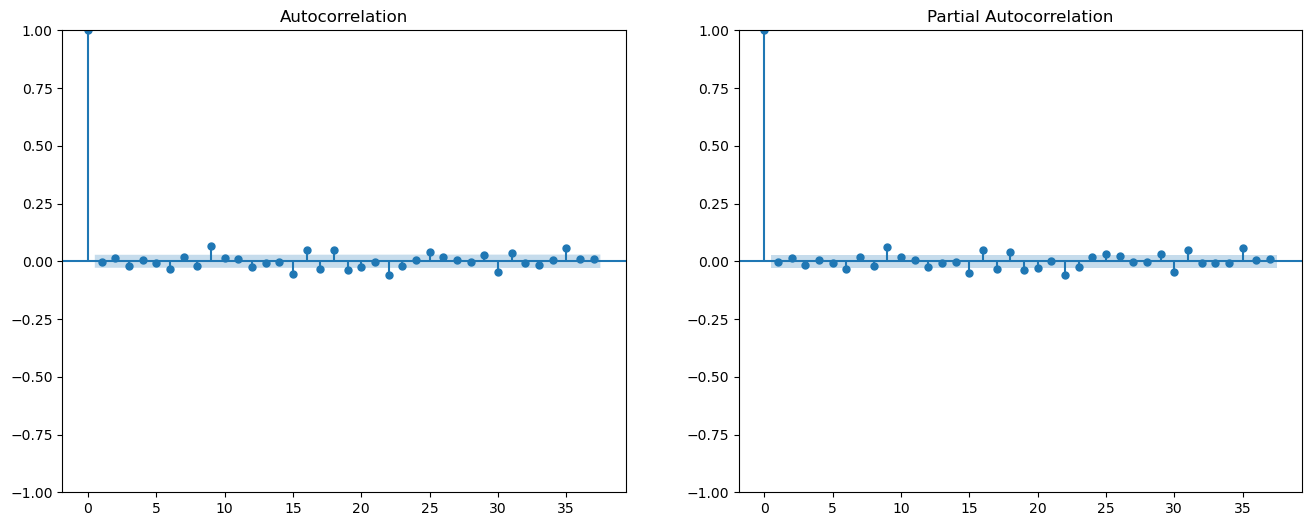

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load and preprocess the dataset
google_stock = pd.read_csv('data/GOOG.csv', index_col='Date', parse_dates=True)
google_stock.sort_index(inplace=True)

# Check for stationarity
result = adfuller(google_stock['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Fit the ARIMA model
model = ARIMA(google_stock['Close'], order=(1,1,1))  # Example order, adjust based on data
fit = model.fit()

# Forecast
forecast = fit.get_forecast(steps=365)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast along with the confidence interval
plt.figure(figsize=(14, 7))
plt.plot(google_stock['Close'], label='Observed')
plt.plot(pd.date_range(google_stock.index[-1], periods=366, freq='D')[1:], forecast_mean, label='Forecast', color='red')
plt.fill_between(pd.date_range(google_stock.index[-1], periods=366, freq='D')[1:], conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('365-Day ARIMA Forecast of Google Stock Prices')
plt.legend()
plt.show()

# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(fit.resid.dropna(), ax=ax[0])
plot_pacf(fit.resid.dropna(), ax=ax[1])
plt.show()
